# Final Project

## Scott Scheraga  7/24/2020





In [1]:
#Code is largely built off of https://keras.io/examples/rl/ddpg_pendulum/
#HER code is inspired by pybullet code at https://github.com/buntyke/her/blob/master/ddpg_her.py

#from gym.envs.registration import registry, make, spec, register
#python -m pybullet_envs.examples.enjoy_TF_HalfCheetahBulletEnv_v0_2017may


import gym
import pybullet_envs
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from gym import wrappers
from IPython import display

from datetime import datetime

%matplotlib inline
import math 

import os
import gym
from gym import utils
from gym.envs import mujoco
import mujoco_py
import cv2
from gym.envs.robotics import fetch_env
import threading
threading.activeCount()


import multiprocessing

def worker():
    """worker function"""
    print ('Worker')
    return

if __name__ == '__main__':
    jobs = []
    for i in range(20):
        p = multiprocessing.Process(target=worker)
        jobs.append(p)
        p.start()
        
threading.activeCount()


WorkerWorker

Worker
Worker
Worker
Worker
Worker
Worker
Worker
Worker
Worker
Worker
WorkerWorkerWorkerWorkerWorkerWorker





5



Worker
Worker


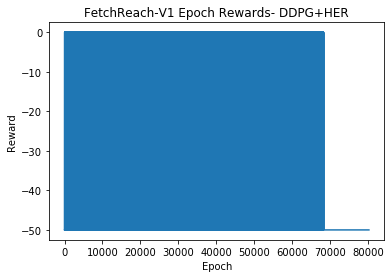

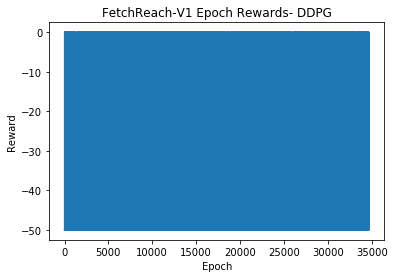

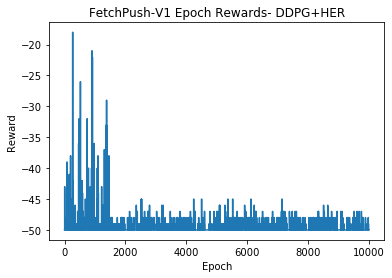

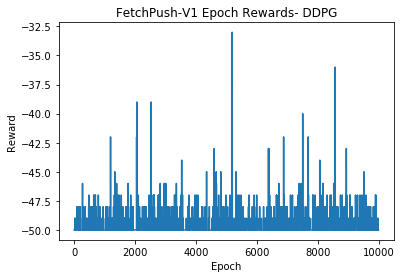

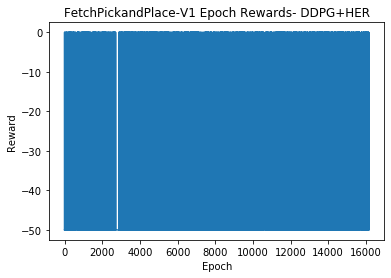

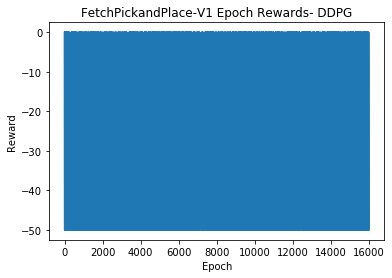

10001


In [2]:
rewardlistreachHER = []
rewardlistreachNOHER = []
rewardlistpicplaceHER = []
rewardlistpicplaceNOHER = []
rewardlistpushHER = []
rewardlistpushNOHER = []

#rewardlistpicplace-noHER.txt
#rewardlistreachHER.txt
#rewardlistpicplace.txt
#rewardlistpushHER.txt

# open file and read the content in a list
with open('rewardlistpushHER.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistpushHER.append(currentPlace)
rewardlistpushHER=np.array(rewardlistpushHER, dtype=np.float32)

with open('rewardlistpushNOHER.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistpushNOHER.append(currentPlace)
rewardlistpushNOHER=np.array(rewardlistpushNOHER, dtype=np.float32)




with open('rewardlistreachHER.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistreachHER.append(currentPlace)
rewardlistreachHER=np.array(rewardlistreachHER, dtype=np.float32)

with open('rewardlistreachNOHER.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistreachNOHER.append(currentPlace)
rewardlistreachNOHER=np.array(rewardlistreachNOHER, dtype=np.float32)

with open('rewardlistpicplace.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistpicplaceHER.append(currentPlace)
rewardlistpicplaceHER=np.array(rewardlistpicplaceHER, dtype=np.float32)

with open('rewardlistpicplace-noHER.txt', 'r') as filehandle:
    for line in filehandle:
        # remove linebreak which is the last character of the string
        currentPlace = line[:-1]
        # add item to the list
        rewardlistpicplaceNOHER.append(currentPlace)
rewardlistpicplaceNOHER=np.array(rewardlistpicplaceNOHER, dtype=np.float32)




plt.plot(rewardlistpushHER, label='ParamSet1')
plt.title("FetchReach-V1 Epoch Rewards- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()

plt.plot(rewardlistpushNOHER, label='ParamSet1')
plt.title("FetchReach-V1 Epoch Rewards- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()

plt.plot(rewardlistreachHER, label='ParamSet1')
plt.title("FetchPush-V1 Epoch Rewards- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()
    
plt.plot(rewardlistreachNOHER, label='ParamSet1')
plt.title("FetchPush-V1 Epoch Rewards- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()

plt.plot(rewardlistpicplaceHER, label='ParamSet1')
plt.title("FetchPickandPlace-V1 Epoch Rewards- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()

plt.plot(rewardlistpicplaceNOHER, label='ParamSet1')
plt.title("FetchPickandPlace-V1 Epoch Rewards- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Reward")
plt.show()



print(len(rewardlistreachHER))  

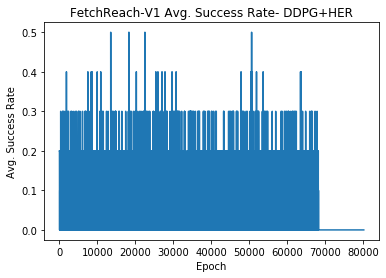

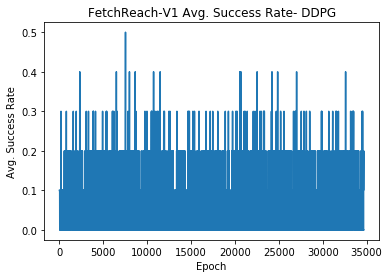

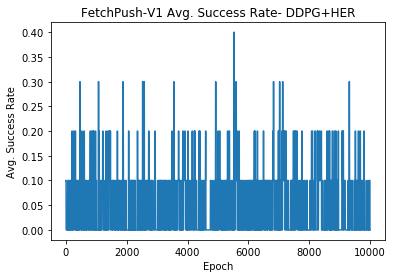

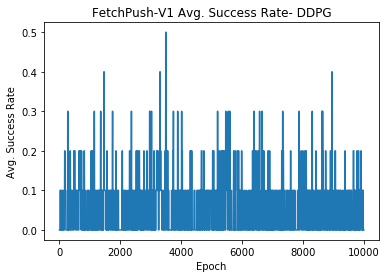

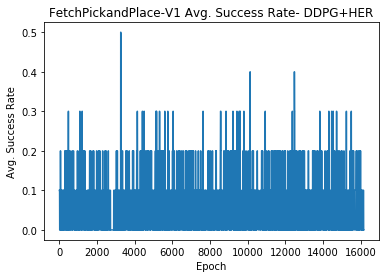

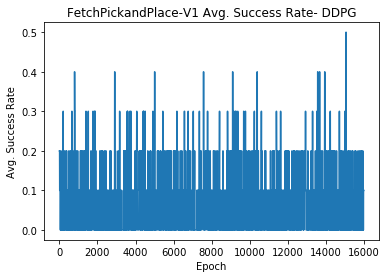

In [3]:
rewardlistreachHERacc=np.zeros(len(rewardlistreachHER))
rewardlistreachNOHERacc=np.zeros(len(rewardlistreachNOHER))

rewardlistpushHERacc=np.zeros(len(rewardlistpushHER))
rewardlistpushNOHERacc=np.zeros(len(rewardlistpushNOHER))

rewardlistpicplaceHERacc=np.zeros(len(rewardlistpicplaceHER))
rewardlistpicplaceNOHERacc=np.zeros(len(rewardlistpicplaceNOHER))

#counter=0
acc=0
accNUM=0
accDENOM=10
i=0

for i in range(len(rewardlistreachHER)):
    #if rewardlistreachHER[i]>-50 and rewardlistreachHER[i]<0:
    if rewardlistreachHER[i]>-50 :    
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistreachHERacc[g]=accNUM/accDENOM
            
        acc=0
        accNUM=0
    i=i+accDENOM
    
i=0

for i in range(len(rewardlistreachNOHER)):
    #if rewardlistreachNOHER[i]>-50 and rewardlistreachNOHER[i]<0:
    if rewardlistreachNOHER[i]>-50:
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistreachNOHERacc[g]=accNUM/accDENOM
        acc=0
        accNUM=0
    i=i+accDENOM
    


i=0



for i in range(len(rewardlistpushHER)):
    #if rewardlistpushHER[i]>-50 and rewardlistpushHER[i]<0:
    if rewardlistpushHER[i]>-50:
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistpushHERacc[g]=accNUM/accDENOM
        acc=0
        accNUM=0


i=0
for i in range(len(rewardlistpushNOHER)):
    #if rewardlistpushNOHER[i]>-50 and rewardlistpushNOHER[i]<0:
    if rewardlistpushNOHER[i]>-50:    
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistpushNOHERacc[g]=accNUM/accDENOM
        acc=0
        accNUM=0



i=0
for i in range(len(rewardlistpicplaceHER)):
    #if rewardlistpicplaceHER[i]>-50 and rewardlistpicplaceHER[i]<0:
    if rewardlistpicplaceHER[i]>-50:    
        
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistpicplaceHERacc[g]=accNUM/accDENOM
        acc=0
        accNUM=0


i=0
for i in range(len(rewardlistpicplaceNOHER)):
    #if rewardlistpicplaceNOHER[i]>-50 and rewardlistpicplaceNOHER[i]<0:
    if rewardlistpicplaceNOHER[i]>-50:    
        accNUM+=1
    
    if i%accDENOM ==0:
        for g in range(i-accDENOM,i):
            rewardlistpicplaceNOHERacc[g]=accNUM/accDENOM
        acc=0
        accNUM=0



plt.plot(rewardlistpushHERacc, label='ParamSet1')
plt.title("FetchReach-V1 Avg. Success Rate- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()

plt.plot(rewardlistpushNOHERacc, label='ParamSet1')
plt.title("FetchReach-V1 Avg. Success Rate- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()

plt.plot(rewardlistreachHERacc, label='ParamSet1')
plt.title("FetchPush-V1 Avg. Success Rate- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()
    
plt.plot(rewardlistreachNOHERacc, label='ParamSet1')
plt.title("FetchPush-V1 Avg. Success Rate- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()

plt.plot(rewardlistpicplaceHERacc, label='ParamSet1')
plt.title("FetchPickandPlace-V1 Avg. Success Rate- DDPG+HER")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()

plt.plot(rewardlistpicplaceNOHERacc, label='ParamSet1')
plt.title("FetchPickandPlace-V1 Avg. Success Rate- DDPG")
plt.xlabel("Epoch")
plt.ylabel("Avg. Success Rate")
plt.show()


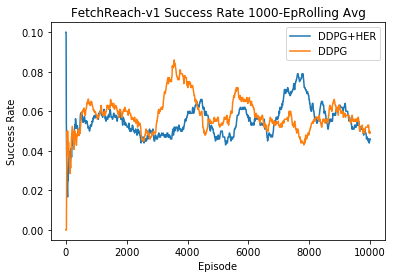

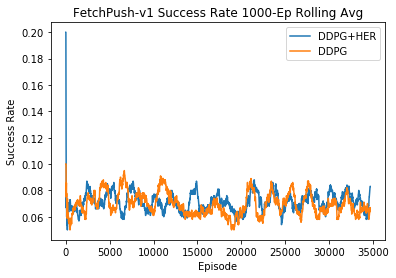

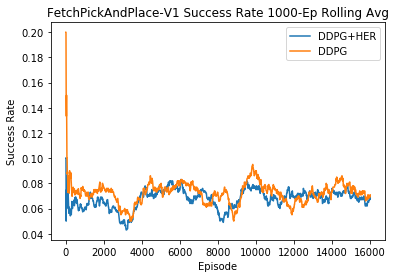

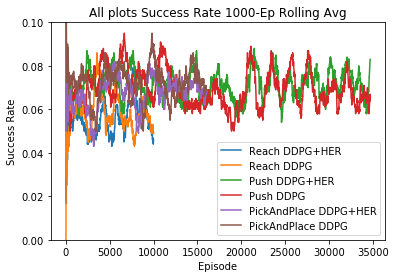

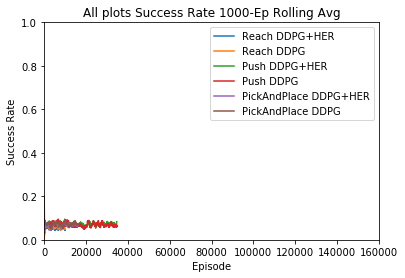

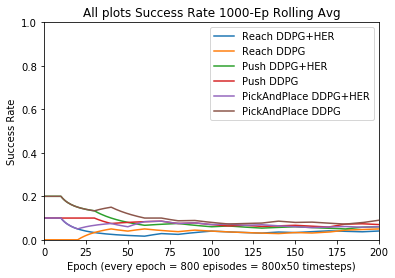

In [6]:
rewardlistreachHERaccrollavg=np.zeros(10000)
rewardlistreachNOHERaccrollavg=np.zeros(10000)

rewardlistpushHERaccrollavg=np.zeros(34681)  #65000  ful amount
rewardlistpushNOHERaccrollavg=np.zeros(34681)

rewardlistpicplaceHERaccrollavg=np.zeros(16000)
rewardlistpicplaceNOHERaccrollavg=np.zeros(16000)

rewardlistreachHERaccrollavg=np.array(rewardlistreachHERaccrollavg, dtype=np.float32)
rewardlistreachNOHERaccrollavg=np.array(rewardlistreachNOHERaccrollavg, dtype=np.float32)

rewardlistpushHERaccrollavg=np.array(rewardlistpushHERaccrollavg, dtype=np.float32)
rewardlistpushNOHERaccrollavg=np.array(rewardlistpushNOHERaccrollavg, dtype=np.float32)

rewardlistpicplaceHERaccrollavg=np.array(rewardlistpicplaceHERaccrollavg, dtype=np.float32)
rewardlistpicplaceNOHERaccrollavg=np.array(rewardlistpicplaceNOHERaccrollavg, dtype=np.float32)

avgrange=1000#Rolling Average range

#print(np.mean(rewardlist200v1[0:14]))
counter=0
for i in rewardlistreachHERacc:
    if counter==10000:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistreachHERaccrollavg[0]=rewardlistreachHERacc[0]
        else:    
            rewardlistreachHERaccrollavg[counter]=np.mean(
            rewardlistreachHERacc[0:counter])
    else:
        rewardlistreachHERaccrollavg[counter]=np.mean(
            rewardlistreachHERacc[counter-avgrange:counter])
    counter+=1
    
counter=0
for i in rewardlistreachNOHERacc:
    if counter==10000:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistreachNOHERaccrollavg[0]=rewardlistreachNOHERacc[0]
        else:    
            rewardlistreachNOHERaccrollavg[counter]=np.mean(
            rewardlistreachNOHERacc[0:counter])
    else:
        rewardlistreachNOHERaccrollavg[counter]=np.mean(
            rewardlistreachNOHERacc[counter-avgrange:counter])
    counter+=1
    
    

#print(np.mean(rewardlist200v1[0:14]))
counter=0
for i in rewardlistpushHERacc:
    if counter==34681:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistpushHERaccrollavg[0]=rewardlistpushHERacc[0]
        else:    
            rewardlistpushHERaccrollavg[counter]=np.mean(
            rewardlistpushHERacc[0:counter])
    else:
        rewardlistpushHERaccrollavg[counter]=np.mean(
            rewardlistpushHERacc[counter-avgrange:counter])
    counter+=1
    
counter=0
for i in rewardlistpushNOHERacc:
    if counter==34681:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistpushNOHERaccrollavg[0]=rewardlistpushNOHERacc[0]
        else:    
            rewardlistpushNOHERaccrollavg[counter]=np.mean(
            rewardlistpushNOHERacc[0:counter])
    else:
        rewardlistpushNOHERaccrollavg[counter]=np.mean(
            rewardlistpushNOHERacc[counter-avgrange:counter])
    counter+=1    
    
    
counter=0
for i in rewardlistpicplaceHERacc:
    if counter==16000:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistpicplaceHERaccrollavg[0]=rewardlistpicplaceHERacc[0]
        else:    
            rewardlistpicplaceHERaccrollavg[counter]=np.mean(
            rewardlistpicplaceHERacc[0:counter])
    else:
        rewardlistpicplaceHERaccrollavg[counter]=np.mean(
            rewardlistpicplaceHERacc[counter-avgrange:counter])
    counter+=1
    
counter=0
for i in rewardlistpicplaceNOHERacc:
    if counter==16000:
        break
    if counter<avgrange:
        if counter==0:
            rewardlistpicplaceNOHERaccrollavg[0]=rewardlistpicplaceNOHERacc[0]
        else:    
            rewardlistpicplaceNOHERaccrollavg[counter]=np.mean(
            rewardlistpicplaceNOHERacc[0:counter])
    else:
        rewardlistpicplaceNOHERaccrollavg[counter]=np.mean(
            rewardlistpicplaceNOHERacc[counter-avgrange:counter])
    counter+=1        
    
    
    
    
plt.plot(rewardlistreachHERaccrollavg, label='DDPG+HER')      
plt.plot(rewardlistreachNOHERaccrollavg, label='DDPG')  
plt.legend(loc='upper right')
plt.title("FetchReach-v1 Success Rate 1000-EpRolling Avg")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.show()    

plt.plot(rewardlistpushHERaccrollavg, label='DDPG+HER')      
plt.plot(rewardlistpushNOHERaccrollavg, label='DDPG')  
plt.legend(loc='upper right')
plt.title("FetchPush-v1 Success Rate 1000-Ep Rolling Avg")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.show()    

plt.plot(rewardlistpicplaceHERaccrollavg, label='DDPG+HER')      
plt.plot(rewardlistpicplaceNOHERaccrollavg, label='DDPG')  
plt.legend(loc='upper right')
plt.title("FetchPickAndPlace-V1 Success Rate 1000-Ep Rolling Avg")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.show()    

plt.plot(rewardlistreachHERaccrollavg, label='Reach DDPG+HER')      
plt.plot(rewardlistreachNOHERaccrollavg, label='Reach DDPG')
plt.plot(rewardlistpushHERaccrollavg, label='Push DDPG+HER')      
plt.plot(rewardlistpushNOHERaccrollavg, label='Push DDPG') 
plt.plot(rewardlistpicplaceHERaccrollavg, label='PickAndPlace DDPG+HER')      
plt.plot(rewardlistpicplaceNOHERaccrollavg, label='PickAndPlace DDPG')  
plt.legend(loc='lower right')
plt.title("All plots Success Rate 1000-Ep Rolling Avg")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.ylim(0, .1)
plt.show()

plt.plot(rewardlistreachHERaccrollavg, label='Reach DDPG+HER')      
plt.plot(rewardlistreachNOHERaccrollavg, label='Reach DDPG')
plt.plot(rewardlistpushHERaccrollavg, label='Push DDPG+HER')      
plt.plot(rewardlistpushNOHERaccrollavg, label='Push DDPG') 
plt.plot(rewardlistpicplaceHERaccrollavg, label='PickAndPlace DDPG+HER')      
plt.plot(rewardlistpicplaceNOHERaccrollavg, label='PickAndPlace DDPG')  
plt.legend(loc='upper right')
plt.title("All plots Success Rate 1000-Ep Rolling Avg")
plt.xlabel("Episode")
plt.ylabel("Success Rate")
plt.xlim(0, 160000)
plt.ylim(0, 1)
plt.show()

plt.plot(rewardlistreachHERaccrollavg, label='Reach DDPG+HER')      
plt.plot(rewardlistreachNOHERaccrollavg, label='Reach DDPG')
plt.plot(rewardlistpushHERaccrollavg, label='Push DDPG+HER')      
plt.plot(rewardlistpushNOHERaccrollavg, label='Push DDPG') 
plt.plot(rewardlistpicplaceHERaccrollavg, label='PickAndPlace DDPG+HER')      
plt.plot(rewardlistpicplaceNOHERaccrollavg, label='PickAndPlace DDPG')  
plt.legend(loc='upper right')
plt.title("All plots Success Rate 1000-Ep Rolling Avg")
plt.xlabel("Epoch (every epoch = 800 episodes = 800x50 timesteps)")
plt.ylabel("Success Rate")
plt.xlim(0, 200)
plt.ylim(0, 1)
plt.show()
